# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Moh. Wahyu Abrory
- Email: wahyuabrory@gmail.com
- Id Dicoding: oudsateen

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import optuna

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from optuna.pruners import MedianPruner
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

/workspaces/student-performance-analysis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Menyiapkan data yang akan diguankan

In [2]:
dataset_url = 'data/data.csv'

df = pd.read_csv(dataset_url, delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## Overview
The dataset contains 4424 entries with 37 columns describing student academic records and contextual information.

## Column Descriptions
### Personal Information
1. **Marital_status**: Student's marital status (encoded as integer)
2. **Gender**: Student's gender (encoded as integer, likely 0/1 for male/female)
3. **Age_at_enrollment**: Student's age at time of enrollment
4. **Nacionality**: Student's nationality (encoded as integer)
5. **International**: Whether student is international (binary flag)

### Academic Background
6. **Previous_qualification**: Type of prior qualification (encoded)
7. **Previous_qualification_grade**: Grade from previous qualification
8. **Admission_grade**: Grade at admission to current program

### Family Background
9. **Mothers_qualification**: Mother's education level (encoded)
10. **Fathers_qualification**: Father's education level (encoded)
11. **Mothers_occupation**: Mother's occupation (encoded)
12. **Fathers_occupation**: Father's occupation (encoded)

### Application Details
13. **Application_mode**: How student applied (encoded category)
14. **Application_order**: Application preference order
15. **Course**: Program/course enrolled in (encoded)
16. **Daytime_evening_attendance**: Attendance time (likely 0=day/1=evening)

### Financial Information
17. **Debtor**: Whether student has tuition debt (binary)
18. **Tuition_fees_up_to_date**: Whether fees are paid (binary)
19. **Scholarship_holder**: Whether student has scholarship (binary)

### Special Circumstances
20. **Displaced**: Whether student is displaced (e.g., refugee)
21. **Educational_special_needs**: Whether has special educational needs

### Academic Performance (1st Semester)
22. **Curricular_units_1st_sem_credited**: Credited units count
23. **Curricular_units_1st_sem_enrolled**: Enrolled units count
24. **Curricular_units_1st_sem_evaluations**: Evaluation attempts
25. **Curricular_units_1st_sem_approved**: Approved units count
26. **Curricular_units_1st_sem_grade**: Average grade
27. **Curricular_units_1st_sem_without_evaluations**: Units not evaluated

### Academic Performance (2nd Semester)
28-33. **Curricular_units_2nd_sem_***: Same metrics as above for 2nd semester

### Economic Context
34. **Unemployment_rate**: Current unemployment rate
35. **Inflation_rate**: Current inflation rate
36. **GDP**: Current GDP indicator

### Target Variable
37. **Status**: Student's academic status (textual outcome - likely dropout/graduate/enrolled)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [5]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
df.duplicated().sum()

np.int64(0)

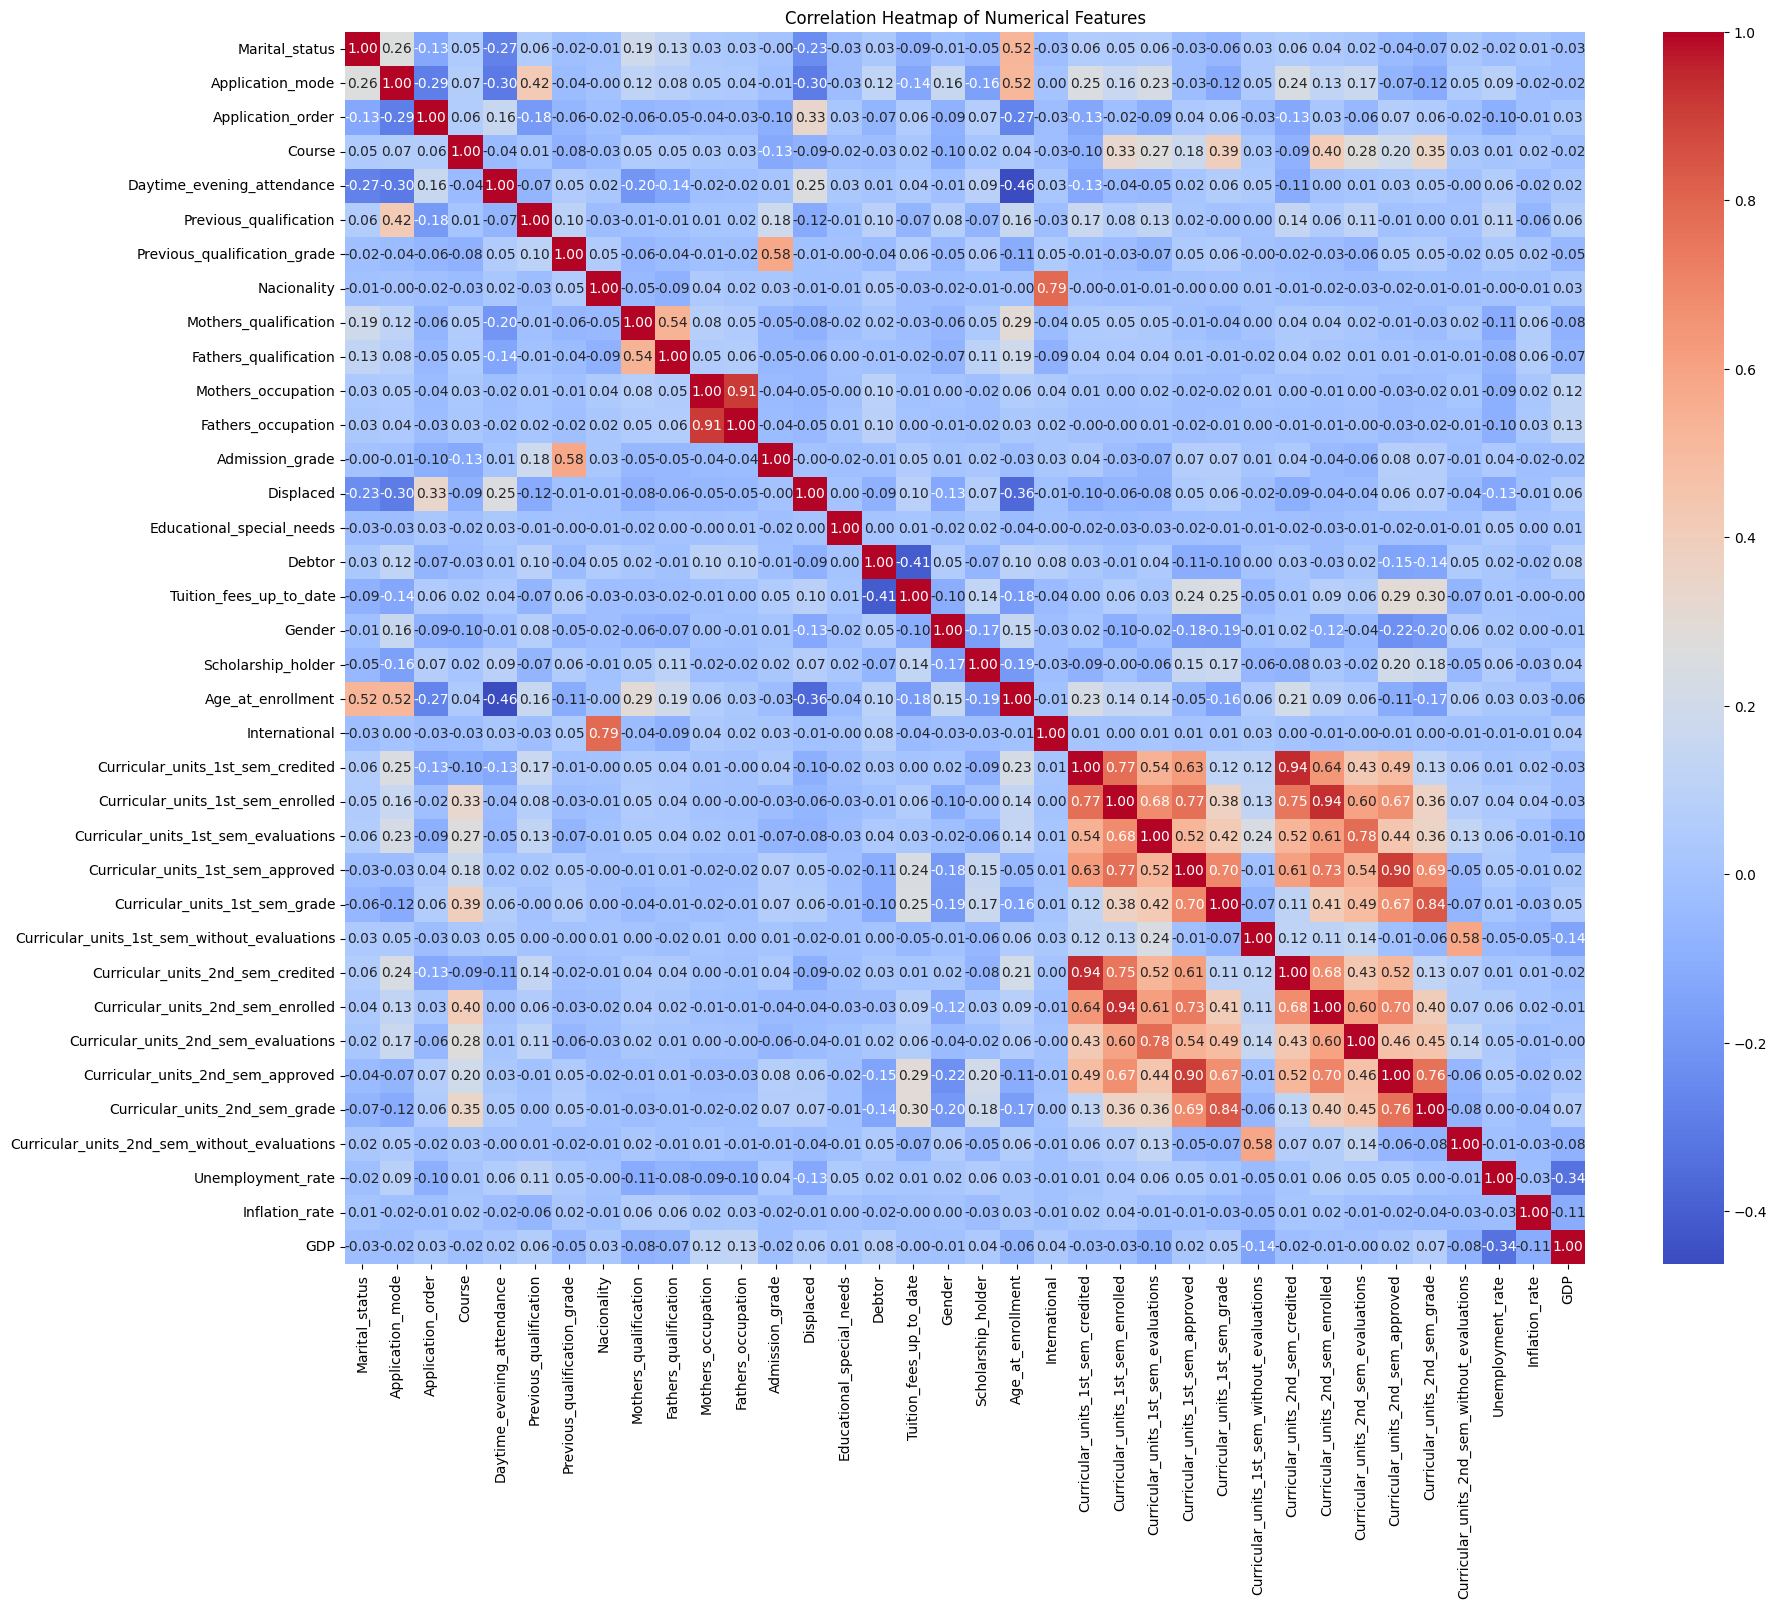

In [7]:
plt.figure(figsize=(20, 16))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Mother's and Father's qualifications are moderately correlated (0.54), and their occupations are very highly correlated (0.91).
- Performance metrics within the same semester (e.g., approved units and grade) are strongly positively correlated (0.70 for 1st sem, 0.76 for 2nd sem).
- Performance metrics between the 1st and 2nd semesters are very strongly correlated (e.g., approved units 1st vs. 2nd sem: 0.90; grades 1st vs. 2nd sem: 0.84). This suggests students who perform well in the first semester tend to continue performing well.
- Being a debtor has a moderate negative correlation with having tuition fees up to date (-0.41). Having tuition fees up to date is moderately positively correlated with being a scholarship holder (0.31).
- High correlations exist between related academic performance metrics (e.g., approved units and grades, 1st sem vs 2nd sem metrics) and between parental occupations.
- Admission grade is moderately correlated with the previous qualification grade (0.58).


In [8]:
df.nunique()

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

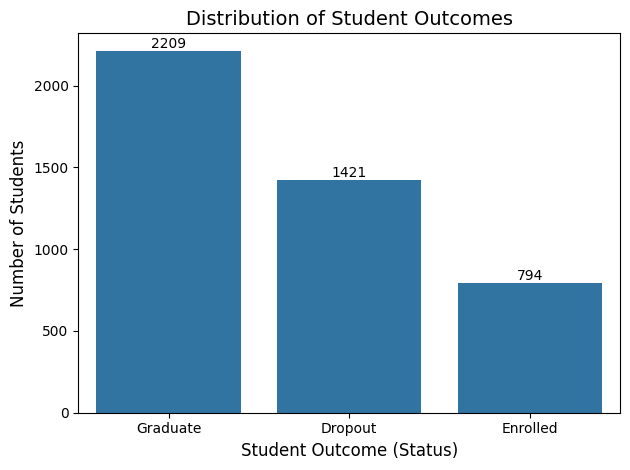

In [9]:
ax = sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Student Outcome (Status)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Distribution of Student Outcomes', fontsize=14)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

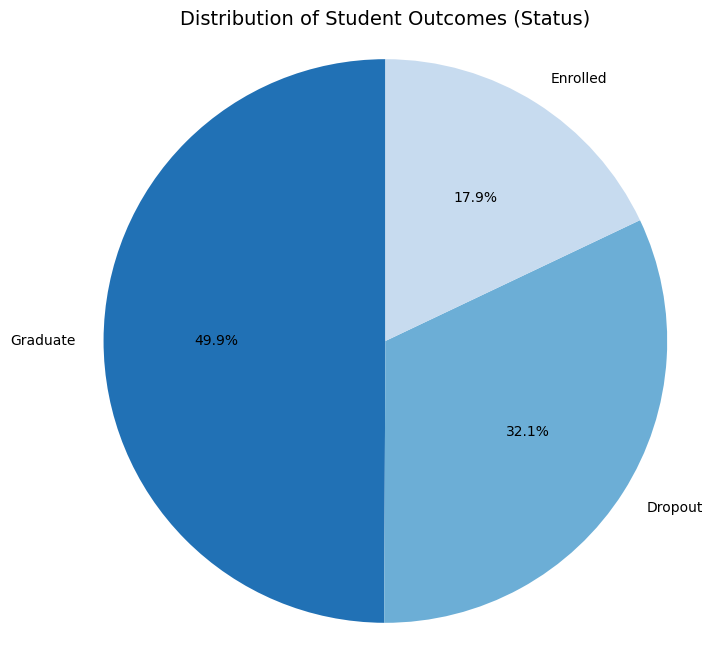

In [10]:
status_counts = df['Status'].value_counts()

colors = sns.color_palette('Blues_r', n_colors=len(status_counts))

plt.figure(figsize=(8, 8))
plt.pie(status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',  
        startangle=90,      
        colors=colors)      


plt.title('Distribution of Student Outcomes (Status)', fontsize=14)

plt.axis('equal')

plt.show()

## Data Preparation / Preprocessing

In [11]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df[categorical_columns].head()
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [12]:
df.to_csv('data/encoded_data.csv', index=False)
df = pd.read_csv('data/encoded_data.csv')

In [13]:
df = df[df['Status'] != 1]

df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})

df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [14]:
df_filtered = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df_filtered

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [ ]:
X = df.drop(columns=['Status'], axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

Training Logistic Regression...
Training SVC...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training KNN...
Training Naive Bayes...


,Accuracy,Precision,Recall,F1 Score
XGBoost,0.900826,0.905376,0.937639,0.921225
SVC,0.896694,0.894515,0.944321,0.918743
Logistic Regression,0.895317,0.909890,0.922049,0.915929
Random Forest,0.892562,0.897216,0.933185,0.914847
Gradient Boosting,0.892562,0.900648,0.928731,0.914474
Naive Bayes,0.860882,0.865546,0.917595,0.890811
Decision Tree,0.848485,0.891455,0.859688,0.875283
KNN,0.838843,0.845833,0.904232,0.874058


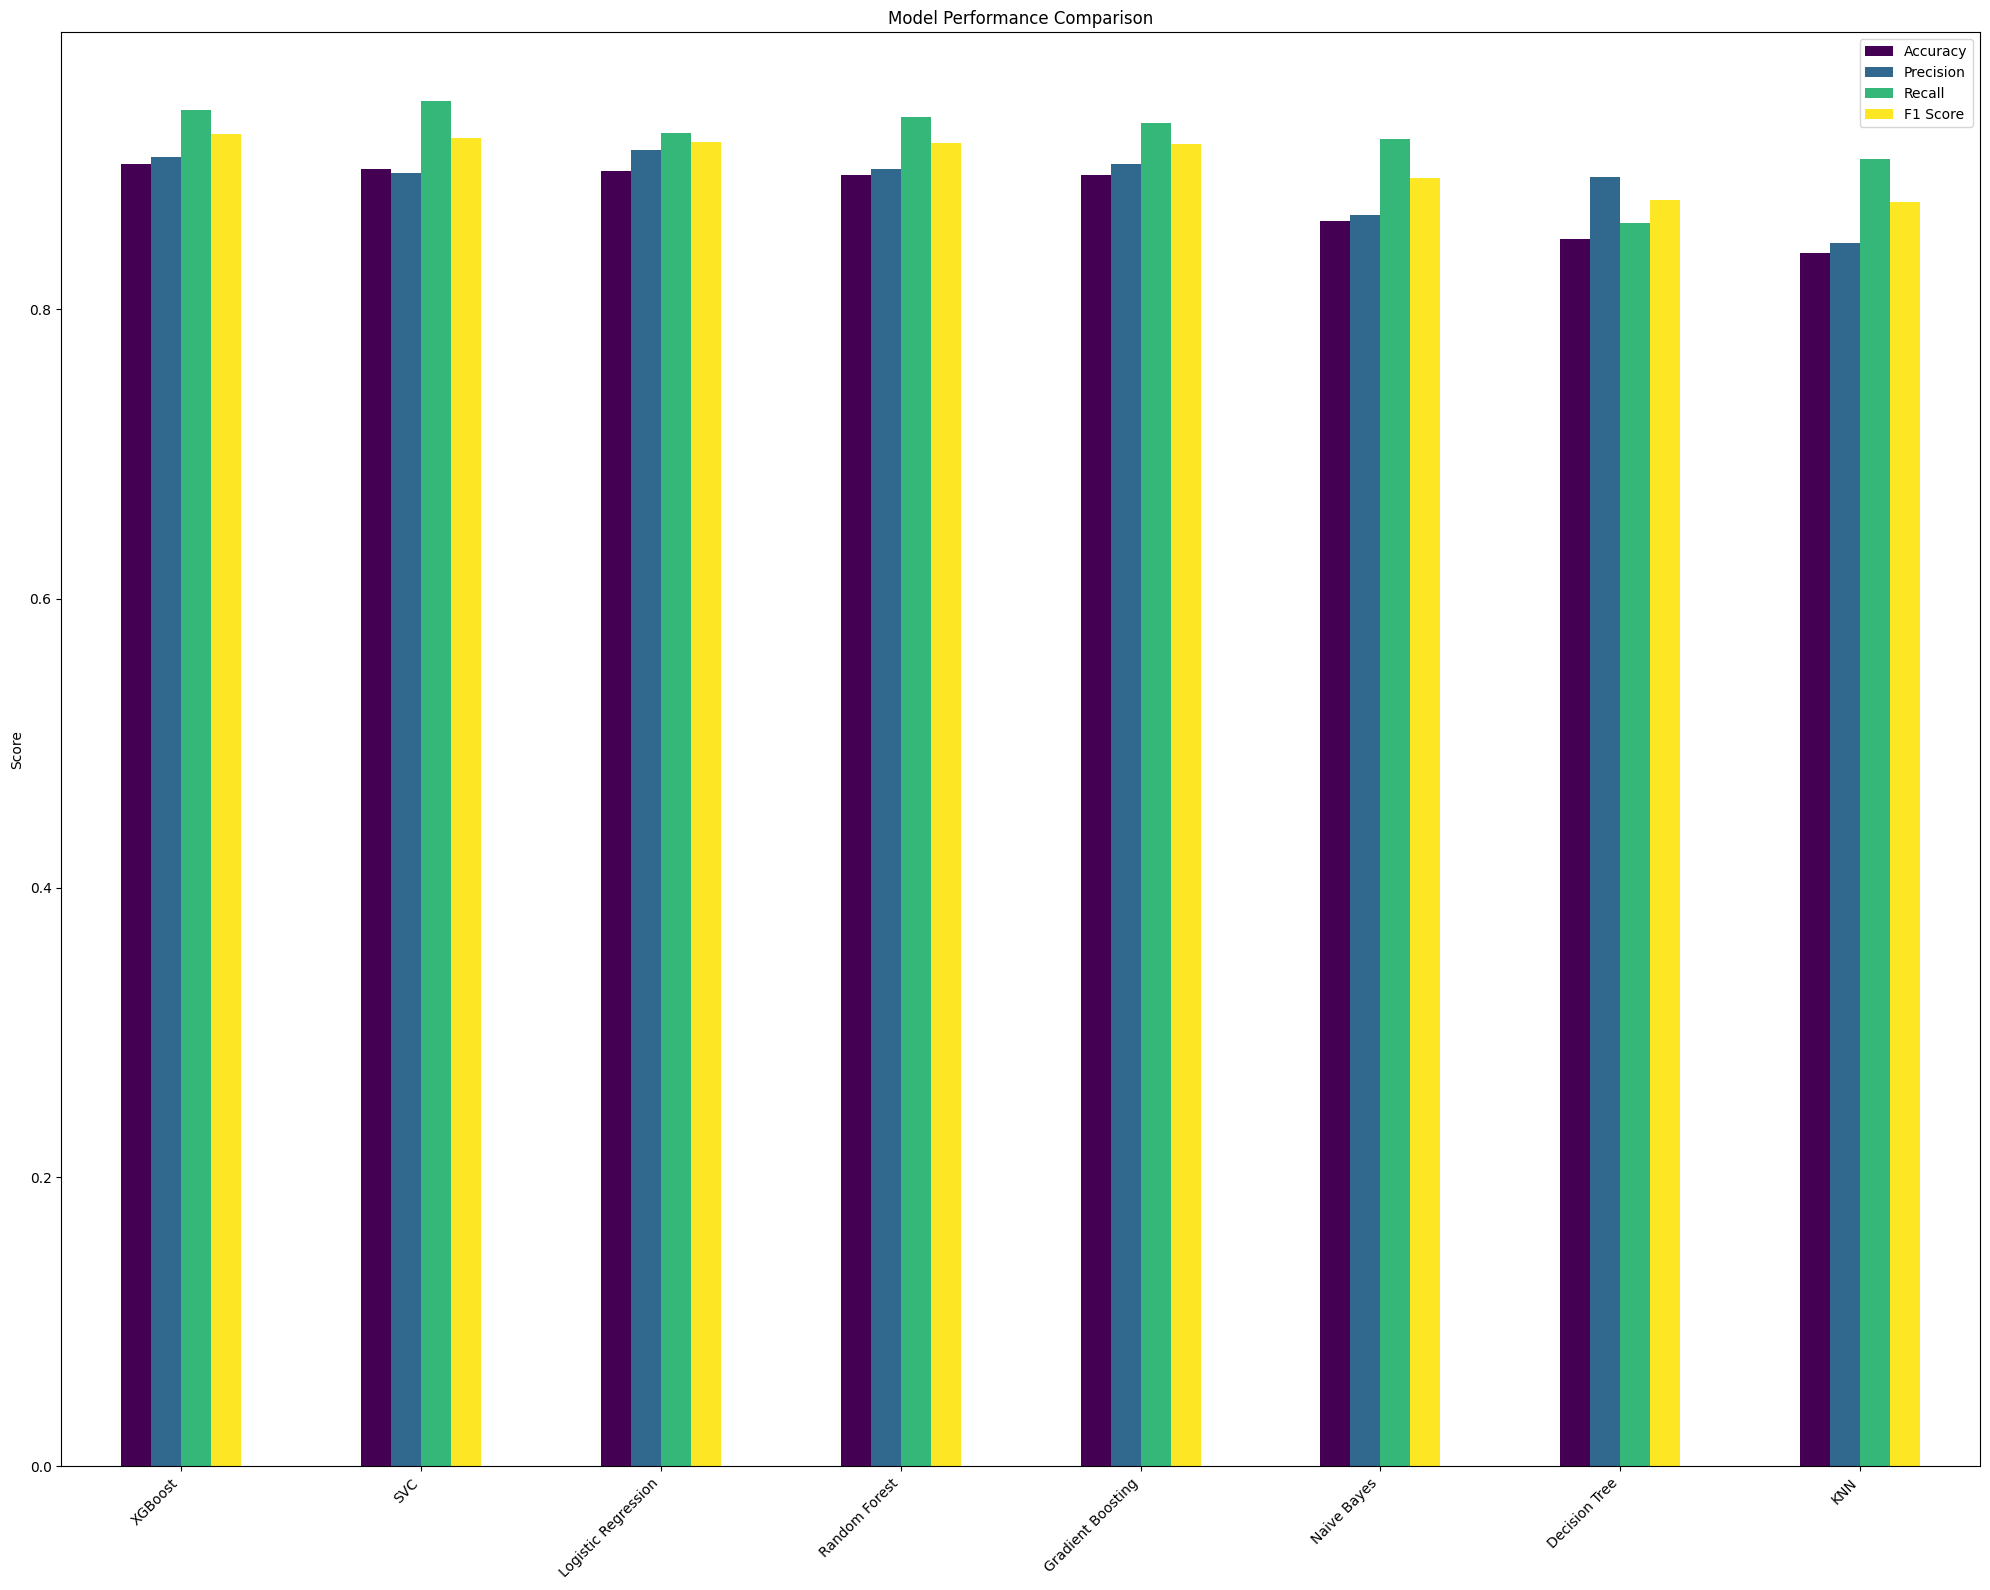


Best model: XGBoost (F1 = 0.9212)


/tmp/ipykernel_37118/2875187260.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nBest model: {best_model_name} (F1 = {results_df['F1 Score'][0]:.4f})")


In [16]:
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", random_state=42),
    "SVC": SVC(probability=True, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

results = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results["Accuracy"][name] = accuracy_score(y_test, y_pred)
    results["Precision"][name] = precision_score(y_test, y_pred)
    results["Recall"][name] = recall_score(y_test, y_pred)
    results["F1 Score"][name] = f1_score(y_test, y_pred)

results_df = pd.DataFrame(results).sort_values("F1 Score", ascending=False)
display(results_df)

results_df.plot(kind='bar', figsize=(20, 16), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


best_model_name = results_df.index[0]
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} (F1 = {results_df['F1 Score'][0]:.4f})")


## Evaluation

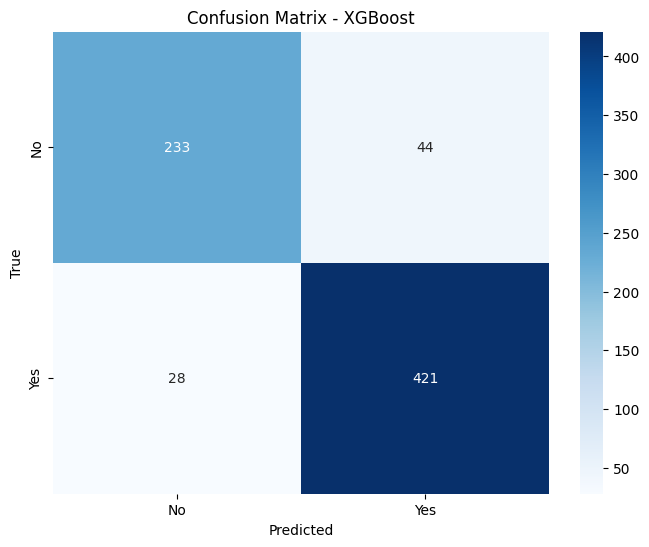


Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       277
           1       0.91      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



In [17]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

print(f"\nClassification Report - {best_model_name}:")
print(classification_report(y_test, y_pred))

In [18]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6)
    }

    model = XGBClassifier(
        **params,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return f1

study = optuna.create_study(direction='maximize', pruner=MedianPruner())
study.optimize(objective, n_trials=100, timeout=600)

print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('  F1 Score: {}'.format(trial.value))
print('  Params:')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = trial.params
best_xgb = XGBClassifier(
    **best_params,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb.fit(X_train, y_train)

[I 2025-05-03 14:13:52,466] A new study created in memory with name: no-name-804100b2-75de-4bc2-8af5-882de7303269
/workspaces/student-performance-analysis/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-03 14:13:52,888] Trial 0 finished with value: 0.9191583610188261 and parameters: {'learning_rate': 0.19430896495111047, 'n_estimators': 476, 'max_depth': 7, 'subsample': 0.6320472359807942, 'colsample_bytree': 0.8701279489874352, 'gamma': 0.38225599127778354, 'min_child_weight': 6}. Best is trial 0 with value: 0.9191583610188261.
/workspaces/student-performance-analysis/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-03 14:13:5

Number of finished trials: 100
Best trial:
  F1 Score: 0.9276315789473685
  Params:
    learning_rate: 0.25013358789042967
    n_estimators: 229
    max_depth: 5
    subsample: 0.8238721989962373
    colsample_bytree: 0.8488117735296248
    gamma: 0.4595817984475199
    min_child_weight: 6


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8488117735296248, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=0.4595817984475199, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25013358789042967,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=229, n_jobs=None,
              num_parallel_tree=None, ...)


Test set metrics:
Accuracy: 0.9091
Precision: 0.9136
Recall: 0.9421
F1 Score: 0.9276


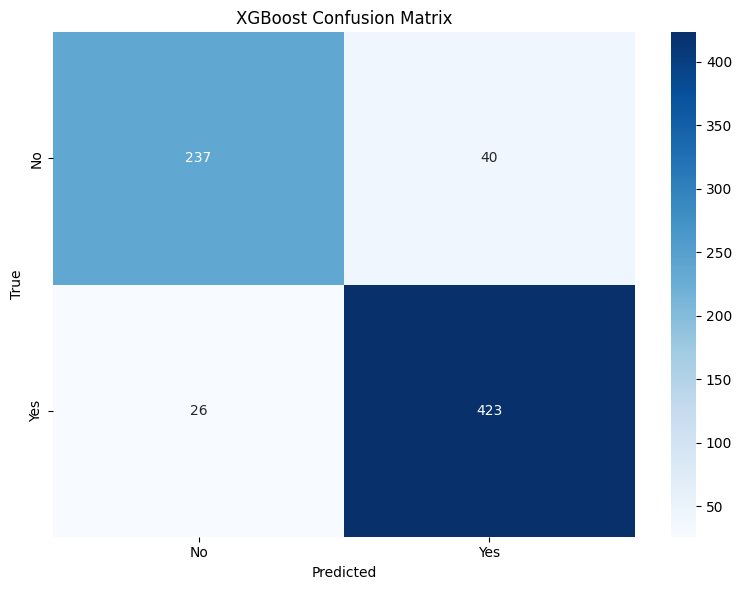


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       277
           1       0.91      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [19]:
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nTest set metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
joblib.dump(best_model, 'model/model_xgb.joblib')

['model_xgb.joblib']